In [1]:
# from __future__ import print_function, division

In [2]:
import numpy as np
from scipy import optimize
from scipy import integrate
import matplotlib.pyplot as plt

# Part 1

In [3]:
#This is directly copied from lecture notes
def gaussian(x, mean, var):
    return (1 / (var * np.sqrt(2*np.pi))) * np.exp (-1/2 * (((x - mean) / (var))**2) )

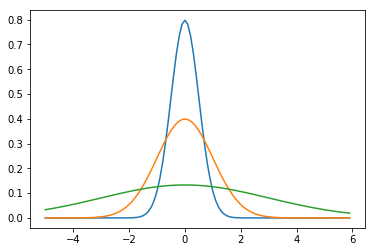

In [4]:
# TODO plot gaussians here
x_data = np.arange(-5,6,0.1)
gaussian1 = gaussian(x_data, 0, 0.5)
gaussian2 = gaussian(x_data, 0, 1)
gaussian3 = gaussian(x_data, 0, 3)
plt.plot(x_data, gaussian1)
plt.plot(x_data, gaussian2)
plt.plot(x_data, gaussian3)

#Yes, this seems expected


[-4.34854654e-10  1.00000000e+00]


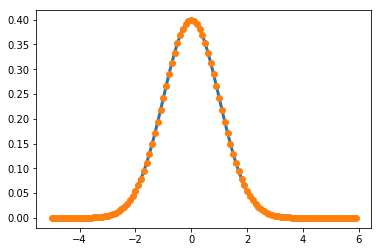

In [5]:
# TODO fit gaussians, with known parameters, here
plt.plot(x_data, gaussian2, lw=3)
params, cov = optimize.curve_fit(gaussian, x_data, gaussian2)
print(params)
plt.plot(x_data, gaussian(x_data, *params), 'o')

#The fit is extremely accurate

In [6]:
# TODO: load data here
x,y = np.loadtxt('HDalpha_data', unpack=True)


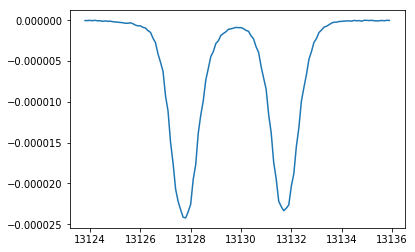

In [7]:
# TODO: plot it
plt.plot(x,y)
plt.show()

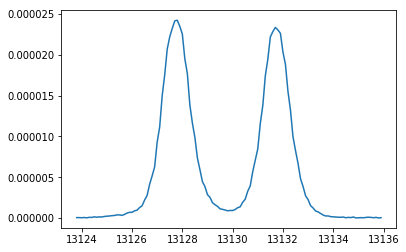

In [8]:
plt.plot(x,-y)
plt.show()

# Part 2

[ 1.31277552e+04  5.44971555e-01  1.31317282e+04  5.57002417e-01
 -3.28023384e-05]


Text(0.5,1,'Curving fitting to emission signal')

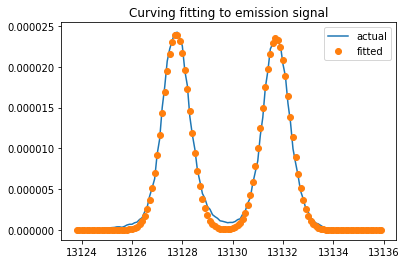

In [9]:
def double_gaussian(x, mean1, var1, mean2, var2, amp):
    return (amp * gaussian(x,mean1,var1)) + (amp * gaussian(x, mean2, var2))
#include guesses
x1_guess = np.arange(13124, 13136)
guess = np.array([13128, .5 , 13132, .5, 0.000025])
par,covar = optimize.curve_fit(double_gaussian, x, y, guess)
print(par)
plt.plot(x,-y,label='actual')
plt.plot(x, -1 * double_gaussian(x, *par), 'o',label='fitted')
plt.legend()
plt.title('Curving fitting to emission signal')

Text(0.5,0.98,'Plotting random data points')

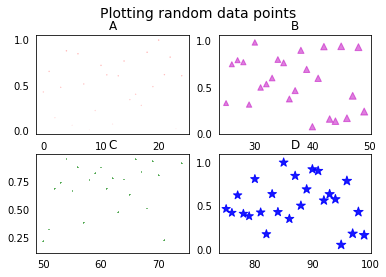

In [50]:
rand_arr1 = np.random.rand(100,1)
rand_arr2 = np.random.rand(100,1)
x0 = np.arange(0,25)
y0 = rand_arr1[0:25,0:1]
x1 = np.arange(25,50)
y1 = rand_arr1[25:50,0:1]
x2 = np.arange(50,75)
y2 = rand_arr1[50:75,0:1]
x3 = np.arange(75,100)
y3 = rand_arr1[75:100,0:1]
f, ((ax0, ax1),(ax2, ax3)) = plt.subplots(2,2)
ax0.set_title('A')
ax0.scatter(x0,y0, s=y0, marker='.', color='r', alpha=0.3)
ax1.set_title('B')
ax1.scatter(x1,y1, s=x1, marker='^', color='m', alpha=0.5)
ax2.set_title('C')
ax2.scatter(x2,y2, s=y2, marker='+',  color='g', alpha=0.7)
ax3.set_title('D')
ax3.scatter(x3,y3, s=x3, marker='*', color='b', alpha=0.9)
ax0.tick_params(tick1On=False, tick2On=False)
ax1.tick_params(tick1On=False, tick2On=False)
ax2.tick_params(tick1On=False, tick2On=False)
ax3.tick_params(tick1On=False, tick2On=False)
plt.suptitle('Plotting random data points', fontsize=14) 

# Part 3

In [11]:
def flux_for_dipole(x_pos, y_pos, Q_vals, X, Y):
    """
    Returns the flux based on the information of the charges
    and the grid of the plot.
    Code modified from Physics 113, written by Blas Cabrera
    """
    flux = np.zeros((len(X), len(Y)))
    x_m = np.outer(np.ones((X.size)), X); 
    y_m = np.outer(Y, np.ones((Y.size))); 
    for n in range(len(Q_vals)):
        flux += 2*np.pi*Q_vals[n]*(1 - (x_pos[n]-x_m)/np.sqrt((y_pos[n]-y_m)**2+(x_pos[n]-x_m)**2))
    return flux

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

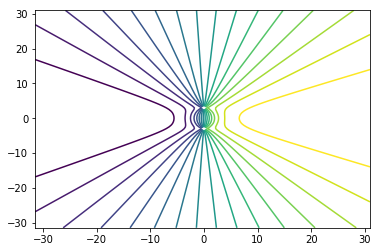

In [53]:
X_array = np.arange(-31.5, 31.5, 0.5)
Y_array = np.arange(-31.5, 31.5, 0.5)
Q_array = [1,1]
x_pos = [0,0]
y_pos = [3,-3]
flux = flux_for_dipole(x_pos, y_pos, Q_array,X_array,Y_array)
plt.contour(X_array, Y_array, flux, 20) 